In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/pz413sz/Documents/saved_notebooks/datasets/AirPassengers.csv')

In [3]:
data.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [4]:
data.isnull().sum()

TravelDate    0
Passengers    0
dtype: int64

In [5]:
data.dtypes

TravelDate    object
Passengers     int64
dtype: object

In [6]:
data['month'] = pd.to_datetime(data['TravelDate'])

In [7]:
data.dtypes

TravelDate            object
Passengers             int64
month         datetime64[ns]
dtype: object

In [8]:
data.drop(['TravelDate'], axis=1, inplace=True)

In [9]:
data = data.set_index('month')

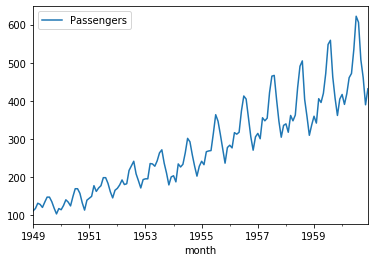

In [10]:
data.plot()

In [11]:
import statsmodels.api as sm

In [12]:
data.head()

,Passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
decomposition=sm.tsa.seasonal_decompose(data,model='addictive')

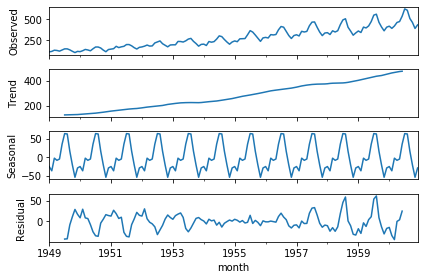

In [14]:
dec = decomposition.plot()

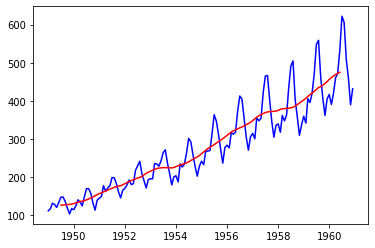

In [15]:
plt.plot(data.index, data['Passengers'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

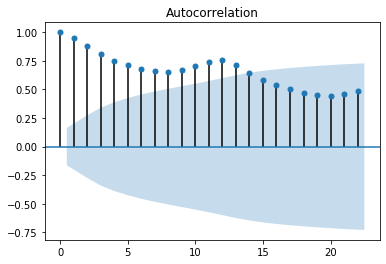

In [17]:
acf = plot_acf(data)

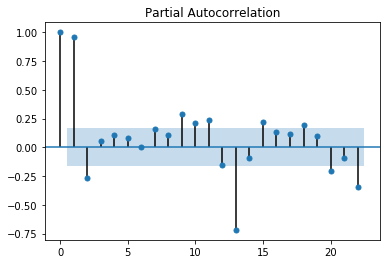

In [18]:
pacf = plot_pacf(data)

# Autoregression (AR)

In [19]:
from statsmodels.tsa.ar_model import AR

In [20]:
train = data[data.index <='1959-12-01'].copy()

In [21]:
model=AR(train,freq='MS')

In [22]:
model_fit = model.fit()

In [23]:
train.tail()

,Passengers
month,
1959-08-01,559
1959-09-01,463
1959-10-01,407
1959-11-01,362
1959-12-01,405


In [24]:
predict =model_fit.predict(start='1959-12-01', end='1961-12-01')

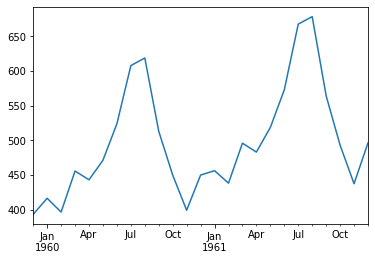

In [25]:
predict.plot()

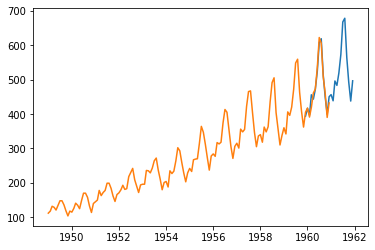

In [26]:
plt.plot(predict.index, predict.values)
plt.plot(data)

# Moving Average (MA)

In [27]:
# The method is suitable for univariate time series without trend and seasonal components.
from statsmodels.tsa.arima_model import ARMA

In [28]:
model=ARMA(train, order=(2,1),freq='MS')

In [29]:
model_fit = model.fit()

In [30]:
predict =model_fit.predict(start='1959-12-01', end='1961-12-01')

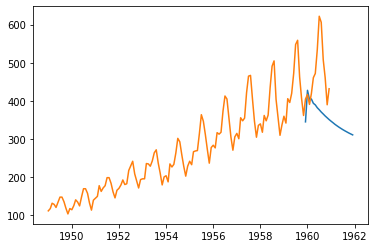

In [31]:
plt.plot(predict.index, predict.values)
plt.plot(data)

# Arima model

In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
model=ARIMA(train, order=(2,1,1),freq='MS')

In [79]:
model_fit = model.fit(disp=0)

In [80]:
predict =model_fit.predict(start='1959-12-01', end='1961-12-01')

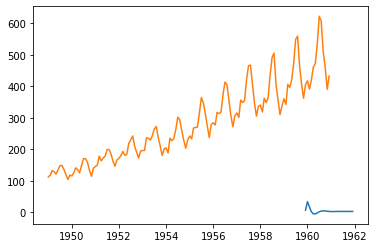

In [81]:
plt.plot(predict.index, predict.values)
plt.plot(data)

# Seasonal Arima

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [73]:
model = SARIMAX(train, freq='MS', order=(2, 1, 1), seasonal_order=(0,1,0,12))

In [74]:
model_fit = model.fit()

In [75]:
predict =model_fit.predict(start='1959-12-01', end='1963-12-01')

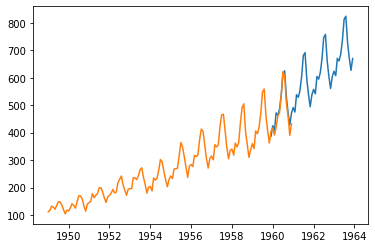

In [76]:
plt.plot(predict.index, predict.values)
plt.plot(data)

# Varmax model require multivariate time series not applicable here

In [42]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [43]:
train['Passengers'] = train['Passengers'].astype(float)

In [44]:
model = VARMAX(train, order=(1, 0))

C:\Users\pz413sz\AppData\Local\Continuum\anaconda3\envs\churn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [45]:
#model_fit = model.fit()

# Holtwinters - Simple Exponential smoothing

In [46]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [47]:
model = SimpleExpSmoothing(train)

C:\Users\pz413sz\AppData\Local\Continuum\anaconda3\envs\churn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [48]:
model_fit = model.fit()

In [49]:
predict =model_fit.predict(start='1959-12-01', end='1963-12-01')

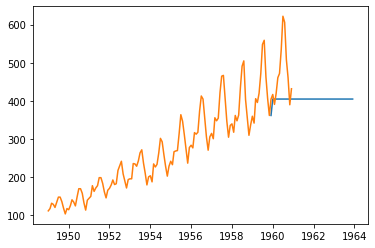

In [50]:
plt.plot(predict.index, predict.values)
plt.plot(data)

# Exponential Smoothing

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [52]:
model = ExponentialSmoothing(train,freq='MS', trend='additive',seasonal='additive',seasonal_periods=12,damped=False)

In [53]:
model_fit = model.fit()

C:\Users\pz413sz\AppData\Local\Continuum\anaconda3\envs\churn\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [54]:
predict =model_fit.predict(start='1959-12-01', end='1963-12-01')

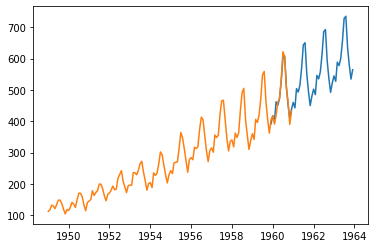

In [55]:
plt.plot(predict.index, predict.values)
plt.plot(data)

# Holt

In [56]:
from statsmodels.tsa.holtwinters import Holt

In [57]:
model = Holt(train,damped=False, exponential=True)

C:\Users\pz413sz\AppData\Local\Continuum\anaconda3\envs\churn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [58]:
model_fit = model.fit()

In [59]:
predict =model_fit.predict(start='1959-12-01', end='1963-12-01')

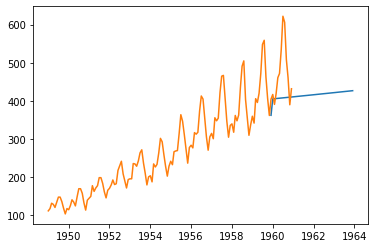

In [60]:
plt.plot(predict.index, predict.values)
plt.plot(data)

# TBATS And Bats does not work

In [61]:
#from tbats import BATS, TBATSM

#estimator = TBATS()

#train = np.array(train)

#model_fit = estimator.fit(train)